In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(z):
  return z**2
  # return 1 / z

def f_inv(z):
  return z**(1 / 2)
  # return 1 / z

In [3]:
def complex_region(re_min, re_max, re_n, im_min, im_max, im_n):
  x = np.linspace(re_min, re_max, re_n)
  y = np.linspace(im_max, im_min, im_n) * 1j

  re, im = np.meshgrid(x, y)
  return re + im

region = complex_region(-12, 12, 250, -12, 12, 250)

In [4]:
# Using preimage
num_rows, num_cols = region.shape

preimage = np.zeros((num_rows, num_cols))

for row in range(num_rows):
  for col in range(num_cols):
    z = region[row][col]
    w = f_inv(z)
    if abs(w.real - round(w.real)) < 0.05 or abs(w.imag - round(w.imag)) < 0.05:
      preimage[row][col] = 100

# print(preimage)

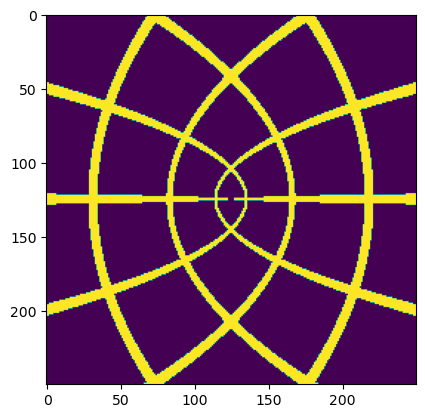

In [5]:
plt.imshow(preimage)
plt.show()

In [6]:
# Using image
num_rows, num_cols = region.shape

image = np.zeros((num_rows, num_cols))

for row in range(num_rows):
  for col in range(num_cols):
    z = region[row][col]
    if abs(z.real - round(z.real)) < 0.05 or abs(z.imag - round(z.imag)) < 0.05:
      w = f(z)
      img_row = int((w.imag + 12) / (24 / 250))
      img_col = int((w.real + 12) / (24 / 250))
      # print(img_row, img_col)
      if img_row < 250 and img_col < 250 and img_row >= 0 and img_col >= 0:
        image[img_row][img_col] = 100

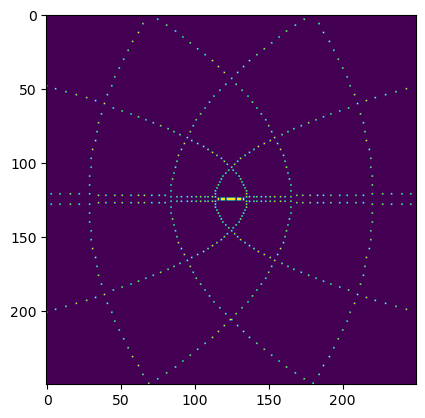

In [7]:
plt.imshow(image)
plt.show()

In [8]:
num_rows, num_cols = region.shape
image = np.zeros((num_rows, num_cols))

w_re_max = 0
w_re_min = 0
w_im_max = 0
w_im_min = 0

# Bound preimage of selected region
for row in range(num_rows):
  for col in range(num_cols):
    z = region[row][col]
    # Requires computing inverse
    w = f_inv(z)

    if w.real > w_re_max:
      w_re_max = w.real
    if w.real < w_re_min:
      w_re_min = w.real
    if w.imag > w_im_max:
      w_im_max = w.imag
    if w.imag < w_im_min:
      w_im_min = w.imag

imags = np.linspace(w_im_min, w_im_max, 1000)
for re in range(int(w_re_min), int(w_re_max) + 1):
  for im in imags:
    z = re + im * 1j
    w = f(z)
    img_row = int(249 * (w.imag + 12) / 24)
    img_col = int(249 * (w.real + 12) / 24)
    if img_row < 250 and img_col < 250 and img_row > 0 and img_col > 0:
      image[img_row][img_col] = (re + 1) * 50

reals = np.linspace(w_re_min, w_re_max, 1000)
for im in range(int(w_im_min), int(w_im_max) + 1):
  for re in reals:
    z = re + im * 1j
    w = f(z)
    img_row = int(249 * (w.imag + 12) / 24)
    img_col = int(249 * (w.real + 12) / 24)
    if img_row < 250 and img_col < 250 and img_row > 0 and img_col > 0:
      image[img_row][img_col] = (re + 1) * 50

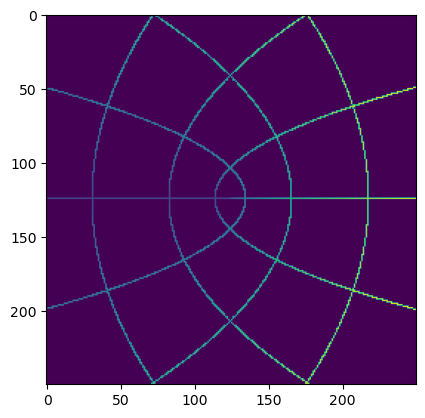

In [9]:
plt.imshow(image)
plt.show()